## Introduction to the GoEmotions Dataset and Our Preprocessing Pipeline 💮



The GoEmotions dataset, developed by Google Research, is a rich collection of text comments annotated with emotions. This dataset contains approximately 58,000 Reddit comments labeled with 27 distinct emotions and a neutral category. What makes GoEmotions particularly valuable for natural language processing and emotion recognition research is its fine-grained emotion taxonomy, including emotions like admiration, amusement, anger, annoyance, approval, and many others. 😸

In our preprocessing pipeline, we've implemented a comprehensive approach to prepare this dataset for machine learning applications, particularly focused on emotion classification. Our process includes several key stages: ⚖

First, we load the dataset using the Hugging Face datasets library, which gives us easy access to the train, validation, and test splits. Each example in the dataset contains text content, emotion labels (represented as indices that map to specific emotions), and unique identifiers.

Our text preprocessing stage implements multiple techniques to clean and normalize the text data:
- Converting all text to lowercase to ensure consistency
- Removing URLs, special characters, and numbers that could introduce noise
- Tokenizing the text into individual words
- Removing common stopwords (like "the", "and", "is") that carry little emotional meaning
- Applying stemming to reduce words to their root form (e.g., "running" becomes "run")
- Performing lemmatization to convert words to their base dictionary form

We've conducted extensive exploratory data analysis to understand the dataset better. This includes visualizing the distribution of emotions to identify class imbalances - some emotions like admiration and amusement appear frequently, while others like grief and nervousness are rare. To address this imbalance, we've calculated class weights inversely proportional to their frequency, which can be used during model training. ⚛

For feature extraction, we've implemented BERT embeddings - a state-of-the-art approach that captures the semantic meaning of text. Each comment is transformed into a 768-dimensional vector that represents its contextual meaning. These rich representations help the model understand the nuanced emotional content of the text better than traditional bag-of-words approaches.  ✅

We've also created various visualizations to gain insights into the data:
- Word clouds for the overall dataset and for the top six emotions
- Histograms showing the distribution of comment lengths
- t-SNE visualizations of the BERT embeddings, colored by emotion

This comprehensive preprocessing pipeline transforms the raw text data into a structured format ready for model training, while also providing valuable insights into the data's characteristics and challenges. The final output includes the preprocessed dataset with BERT embeddings, which can be directly used for training emotion classification models. 😺

## Installing Necessary Libaries ⚛

In [ ]:
pip install numpy pandas matplotlib seaborn wordcloud nltk transformers torch imbalanced-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 34.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 28.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 30.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 9.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 17.2 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlink

In [ ]:
!pip install datasets

## Importing Libraries 📔

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.tokenize import word_tokenize
import re
from datasets import load_dataset
from transformers import BertTokenizer, BertModel
import torch
from sklearn.preprocessing import MultiLabelBinarizer
from collections import Counter
import warnings
warnings.filterwarnings('ignore')

## Download necessary Natural Language Toolkit (NLTK) data ⬇

In [ ]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

## Load dataset ☁

In [ ]:
!pip install datasets

from datasets import load_dataset
import pandas as pd

# Load the GoEmotions dataset from Hugging Face
dataset = load_dataset("go_emotions")

# Convert the dataset to a Pandas DataFrame
df = pd.DataFrame(dataset["train"])

# Save it as a CSV file
df.to_csv("goemotions_dataset.csv", index=False)

# Verify the download
print(df.head())


                                                text labels       id
0  My favourite food is anything I didn't have to...   [27]  eebbqej
1  Now if he does off himself, everyone will thin...   [27]  ed00q6i
2                     WHY THE FUCK IS BAYLESS ISOING    [2]  eezlygj
3                        To make her feel threatened   [14]  ed7ypvh
4                             Dirty Southern Wankers    [3]  ed0bdzj


In [ ]:
print("Loading GoEmotions dataset...")
# Load the GoEmotions dataset
dataset = load_dataset("go_emotions")
print(f"Dataset loaded with {len(dataset['train'])} training examples")

# Check the structure of the dataset
print("\nDataset structure:")
print(dataset)

Loading GoEmotions dataset...
Dataset loaded with 43410 training examples

Dataset structure:
DatasetDict({
    train: Dataset({
        features: ['text', 'labels', 'id'],
        num_rows: 43410
    })
    validation: Dataset({
        features: ['text', 'labels', 'id'],
        num_rows: 5426
    })
    test: Dataset({
        features: ['text', 'labels', 'id'],
        num_rows: 5427
    })
})


## Get the emotion mapping 🗾

In [ ]:
emotion_mapping = dataset['train'].features['labels'].feature.names
print("\nEmotion labels:")
for i, emotion in enumerate(emotion_mapping):
    print(f"{i}: {emotion}")


Emotion labels:
0: admiration
1: amusement
2: anger
3: annoyance
4: approval
5: caring
6: confusion
7: curiosity
8: desire
9: disappointment
10: disapproval
11: disgust
12: embarrassment
13: excitement
14: fear
15: gratitude
16: grief
17: joy
18: love
19: nervousness
20: optimism
21: pride
22: realization
23: relief
24: remorse
25: sadness
26: surprise
27: neutral


## Convert to pandas DataFrame for easier manipulation 🐼

In [ ]:
train_df = pd.DataFrame({
    'text': [example['text'] for example in dataset['train']],
    'labels': [example['labels'] for example in dataset['train']],
    'id': [example['id'] for example in dataset['train']]
})

validation_df = pd.DataFrame({
    'text': [example['text'] for example in dataset['validation']],
    'labels': [example['labels'] for example in dataset['validation']],
    'id': [example['id'] for example in dataset['validation']]
})

test_df = pd.DataFrame({
    'text': [example['text'] for example in dataset['test']],
    'labels': [example['labels'] for example in dataset['test']],
    'id': [example['id'] for example in dataset['test']]
})

print(f"\nTrain set shape: {train_df.shape}")
print(f"Validation set shape: {validation_df.shape}")
print(f"Test set shape: {test_df.shape}")


Train set shape: (43410, 3)
Validation set shape: (5426, 3)
Test set shape: (5427, 3)


In [ ]:
# Check for missing values
print("\nMissing values in train set:")
print(train_df.isnull().sum())


Missing values in train set:
text      0
labels    0
id        0
dtype: int64


## Class distribution analysis ⚡


Analyzing class distribution...


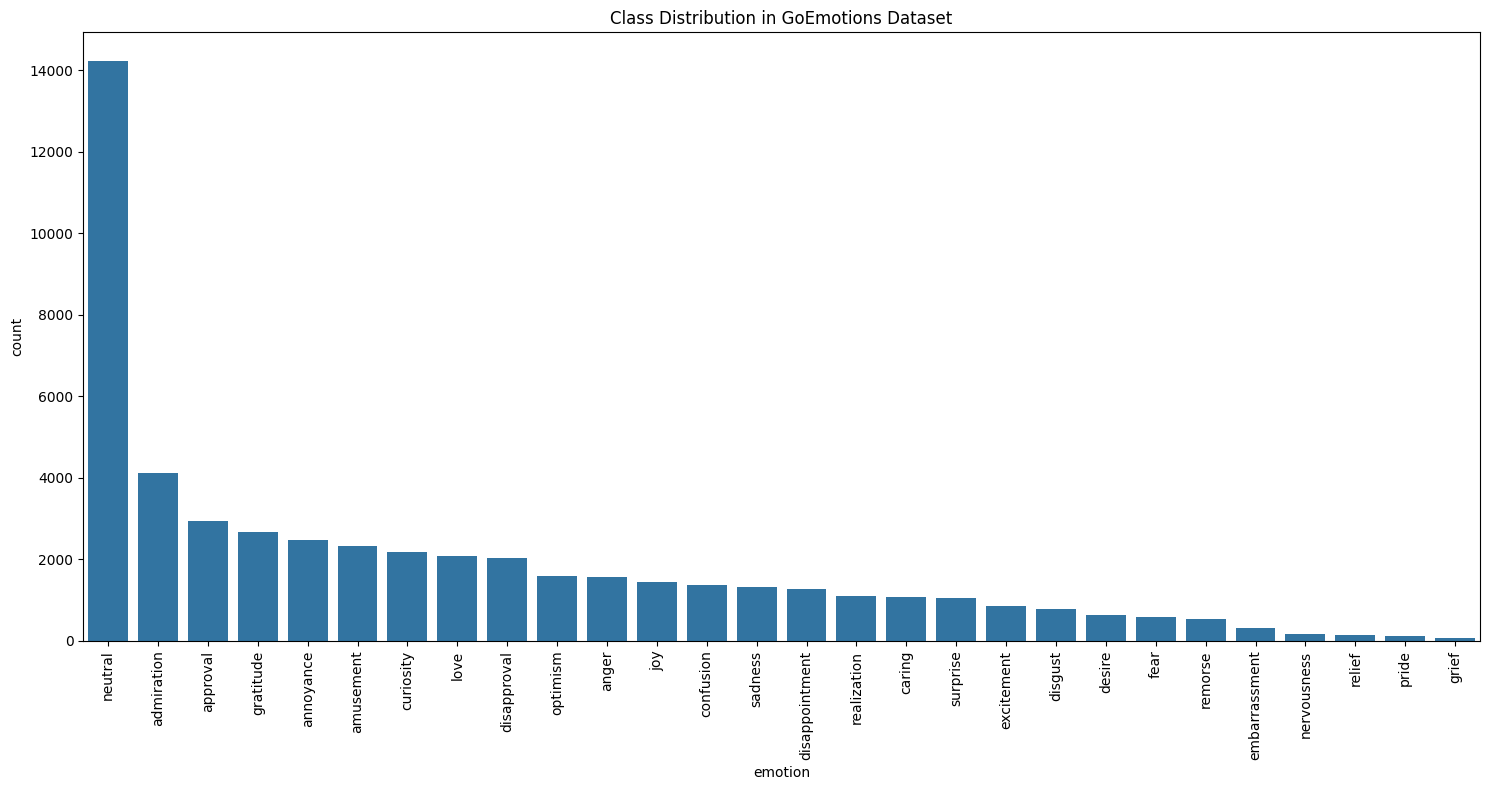

In [ ]:
print("\nAnalyzing class distribution...")
# Create a counter for all emotions
emotion_counts = Counter()
for labels in train_df['labels']:
    for label in labels:
        emotion_counts[emotion_mapping[label]] += 1

# Convert to DataFrame for plotting
emotion_dist_df = pd.DataFrame({
    'emotion': list(emotion_counts.keys()),
    'count': list(emotion_counts.values())
}).sort_values('count', ascending=False)

# Plot class distribution
plt.figure(figsize=(15, 8))
sns.barplot(x='emotion', y='count', data=emotion_dist_df)
plt.xticks(rotation=90)
plt.title('Class Distribution in GoEmotions Dataset')
plt.tight_layout()
plt.savefig('emotion_distribution.png')
plt.show()

## text preprocessing functions 🧮

In [ ]:
# Identify class imbalances
total_samples = sum(emotion_counts.values())
print("\nClass distribution percentages:")
for emotion, count in emotion_counts.most_common():
    percentage = (count / total_samples) * 100
    print(f"{emotion}: {count} samples ({percentage:.2f}%)")


Class distribution percentages:
neutral: 14219 samples (27.82%)
admiration: 4130 samples (8.08%)
approval: 2939 samples (5.75%)
gratitude: 2662 samples (5.21%)
annoyance: 2470 samples (4.83%)
amusement: 2328 samples (4.56%)
curiosity: 2191 samples (4.29%)
love: 2086 samples (4.08%)
disapproval: 2022 samples (3.96%)
optimism: 1581 samples (3.09%)
anger: 1567 samples (3.07%)
joy: 1452 samples (2.84%)
confusion: 1368 samples (2.68%)
sadness: 1326 samples (2.59%)
disappointment: 1269 samples (2.48%)
realization: 1110 samples (2.17%)
caring: 1087 samples (2.13%)
surprise: 1060 samples (2.07%)
excitement: 853 samples (1.67%)
disgust: 793 samples (1.55%)
desire: 641 samples (1.25%)
fear: 596 samples (1.17%)
remorse: 545 samples (1.07%)
embarrassment: 303 samples (0.59%)
nervousness: 164 samples (0.32%)
relief: 153 samples (0.30%)
pride: 111 samples (0.22%)
grief: 77 samples (0.15%)


In [ ]:
# Define text preprocessing functions
def preprocess_text(text):
    """
    Perform text preprocessing:
    1. Convert to lowercase
    2. Remove special characters, URLs, and numbers
    3. Tokenization
    4. Remove stopwords
    5. Stemming and Lemmatization
    """
    # Convert to lowercase
    text = text.lower()

    # Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text)

    # Remove special characters and numbers
    text = re.sub(r'[^a-zA-Z\s]', '', text)

    # Tokenization
    tokens = word_tokenize(text)

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]

    # Stemming
    stemmer = PorterStemmer()
    stemmed_tokens = [stemmer.stem(word) for word in tokens]

    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    lemmatized_tokens = [lemmatizer.lemmatize(word) for word in tokens]

    return {
        'tokens': tokens,
        'stemmed': stemmed_tokens,
        'lemmatized': lemmatized_tokens,
        'processed_text': ' '.join(lemmatized_tokens)  # We'll use lemmatized text for further processing
    }

In [ ]:
# Apply preprocessing to the dataset
print("\nApplying text preprocessing...")
train_df['preprocessing'] = train_df['text'].apply(preprocess_text)
validation_df['preprocessing'] = validation_df['text'].apply(preprocess_text)
test_df['preprocessing'] = test_df['text'].apply(preprocess_text)

# Extract processed text for further use

train_df['processed_text'] = train_df['preprocessing'].apply(lambda x: x['processed_text'])
validation_df['processed_text'] = validation_df['preprocessing'].apply(lambda x: x['processed_text'])
test_df['processed_text'] = test_df['preprocessing'].apply(lambda x: x['processed_text'])

# Sample of preprocessed text

print("\nSample of preprocessed text:")
for i in range(5):
    print(f"Original: {train_df['text'].iloc[i]}")
    print(f"Processed: {train_df['processed_text'].iloc[i]}")
    print(f"Tokens: {train_df['preprocessing'].iloc[i]['tokens']}")
    print(f"Stemmed: {train_df['preprocessing'].iloc[i]['stemmed']}")
    print(f"Lemmatized: {train_df['preprocessing'].iloc[i]['lemmatized']}")
    print("-" * 50)



Applying text preprocessing...

Sample of preprocessed text:
Original: My favourite food is anything I didn't have to cook myself.
Processed: favourite food anything didnt cook
Tokens: ['favourite', 'food', 'anything', 'didnt', 'cook']
Stemmed: ['favourit', 'food', 'anyth', 'didnt', 'cook']
Lemmatized: ['favourite', 'food', 'anything', 'didnt', 'cook']
--------------------------------------------------
Original: Now if he does off himself, everyone will think hes having a laugh screwing with people instead of actually dead
Processed: everyone think he laugh screwing people instead actually dead
Tokens: ['everyone', 'think', 'hes', 'laugh', 'screwing', 'people', 'instead', 'actually', 'dead']
Stemmed: ['everyon', 'think', 'he', 'laugh', 'screw', 'peopl', 'instead', 'actual', 'dead']
Lemmatized: ['everyone', 'think', 'he', 'laugh', 'screwing', 'people', 'instead', 'actually', 'dead']
--------------------------------------------------
Original: WHY THE FUCK IS BAYLESS ISOING
Processed: f

## Create a word cloud 🌨


Generating word cloud...


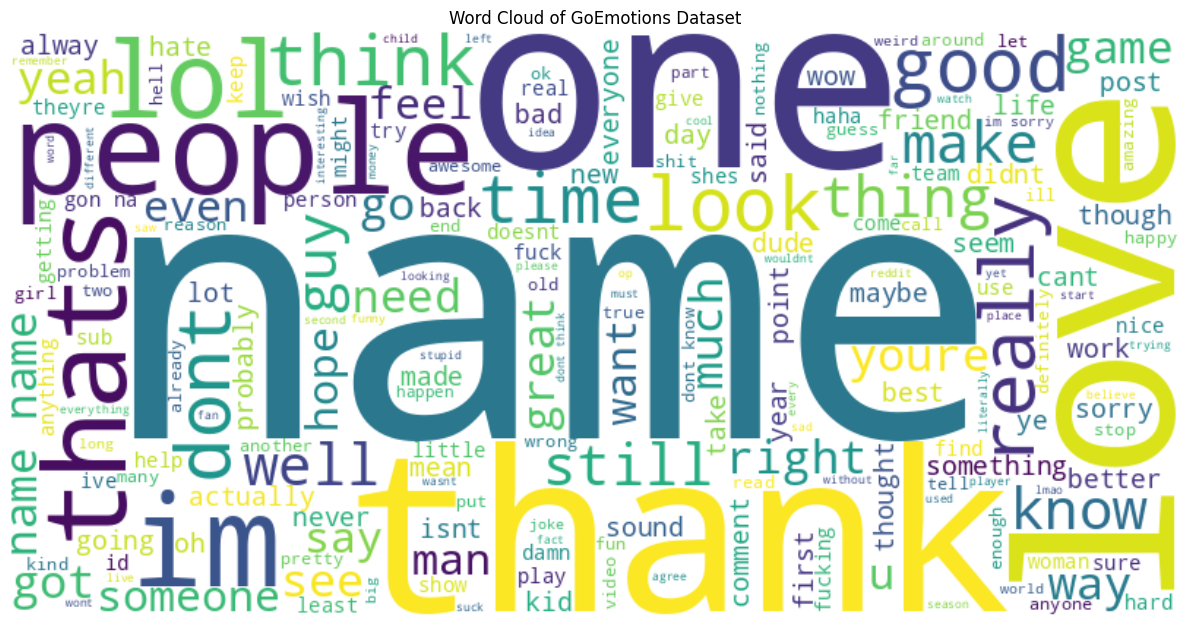

In [ ]:
print("\nGenerating word cloud...")
all_words = ' '.join(train_df['processed_text'])
wordcloud = WordCloud(width=800, height=400, background_color='white', max_words=200).generate(all_words)

plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of GoEmotions Dataset')
plt.tight_layout()
plt.savefig('wordcloud_overall.png')
plt.show()


Generating word clouds for top emotions...


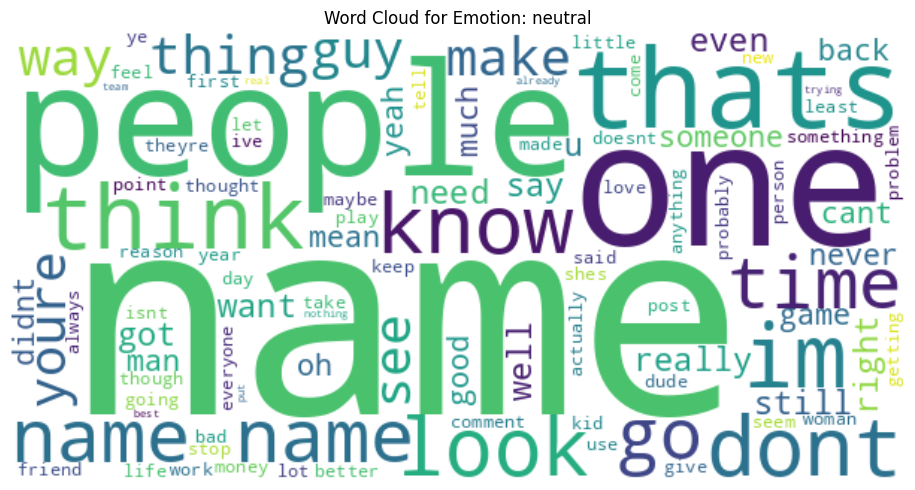

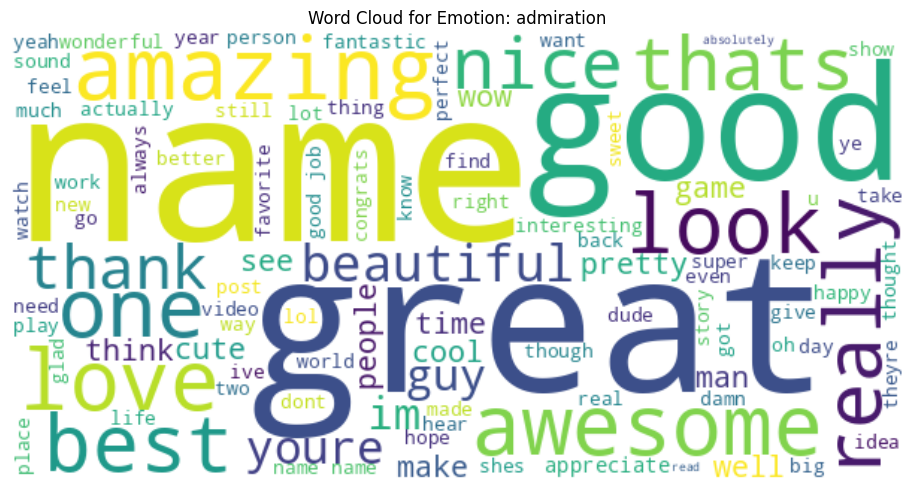

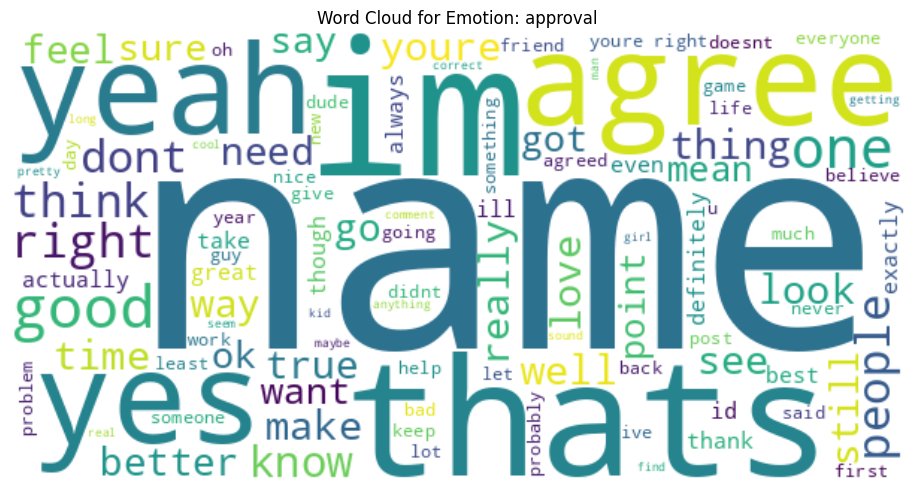

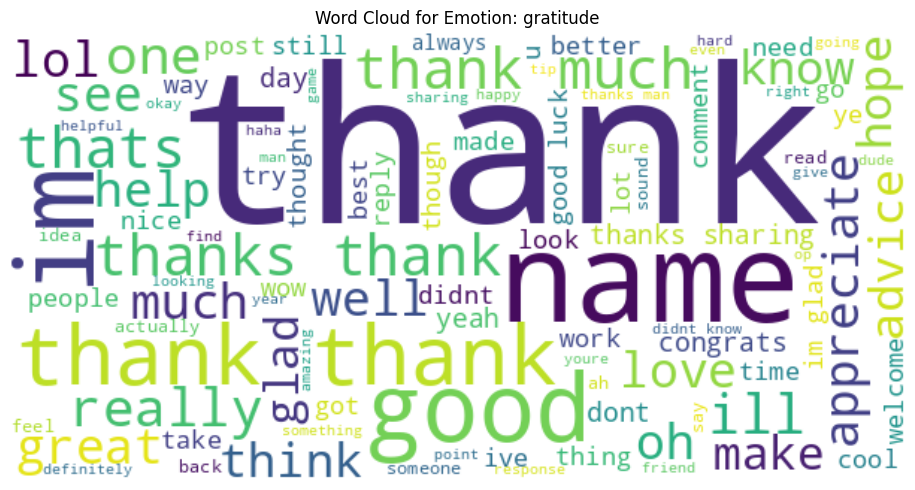

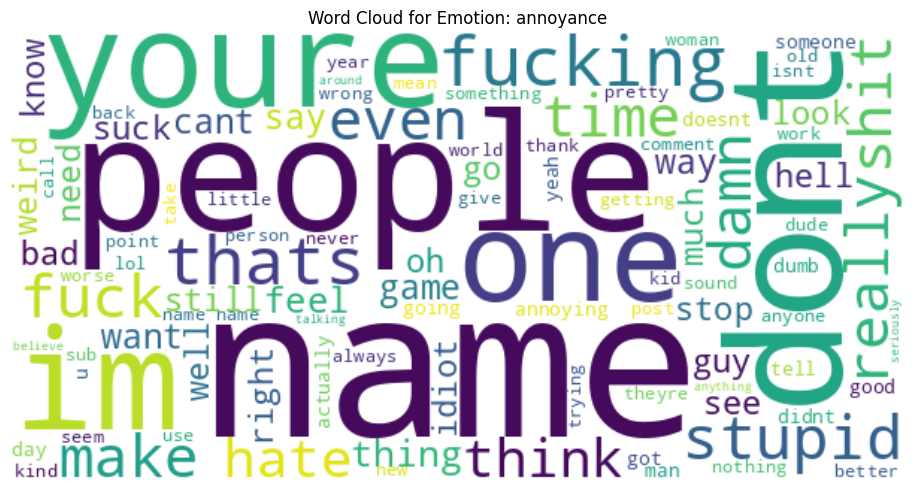

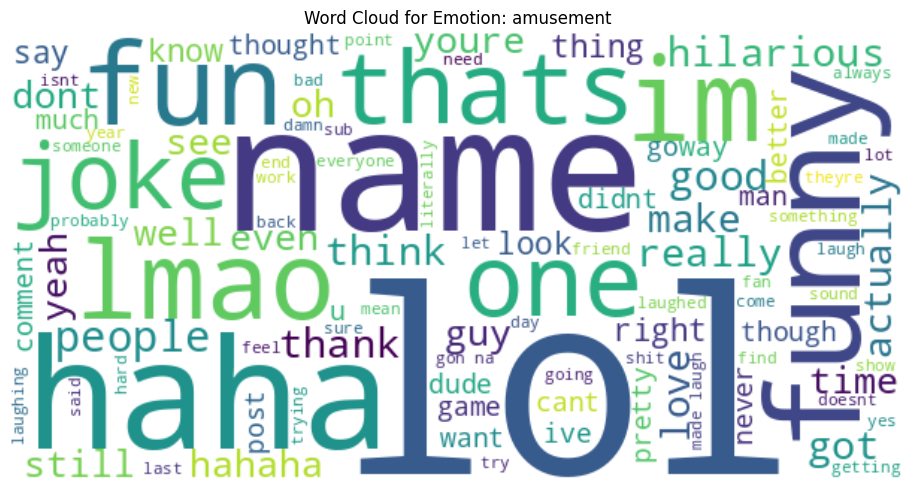

In [ ]:
# Create word clouds for top 6 emotions
print("\nGenerating word clouds for top emotions...")
top_emotions = emotion_dist_df['emotion'].head(6).tolist()

for emotion in top_emotions:
    # Get the indices of examples with this emotion
    emotion_idx = emotion_mapping.index(emotion)

    # Filter texts where this emotion is present
    emotion_texts = []
    for i, labels in enumerate(train_df['labels']):
        if emotion_idx in labels:
            emotion_texts.append(train_df['processed_text'].iloc[i])

    # Create word cloud for this emotion
    if emotion_texts:
        emotion_text = ' '.join(emotion_texts)
        wordcloud = WordCloud(width=600, height=300, background_color='white', max_words=100).generate(emotion_text)

        plt.figure(figsize=(10, 5))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis('off')
        plt.title(f'Word Cloud for Emotion: {emotion}')
        plt.tight_layout()
        plt.savefig(f'wordcloud_{emotion}.png')
        plt.show()


## Token length distribution ✈

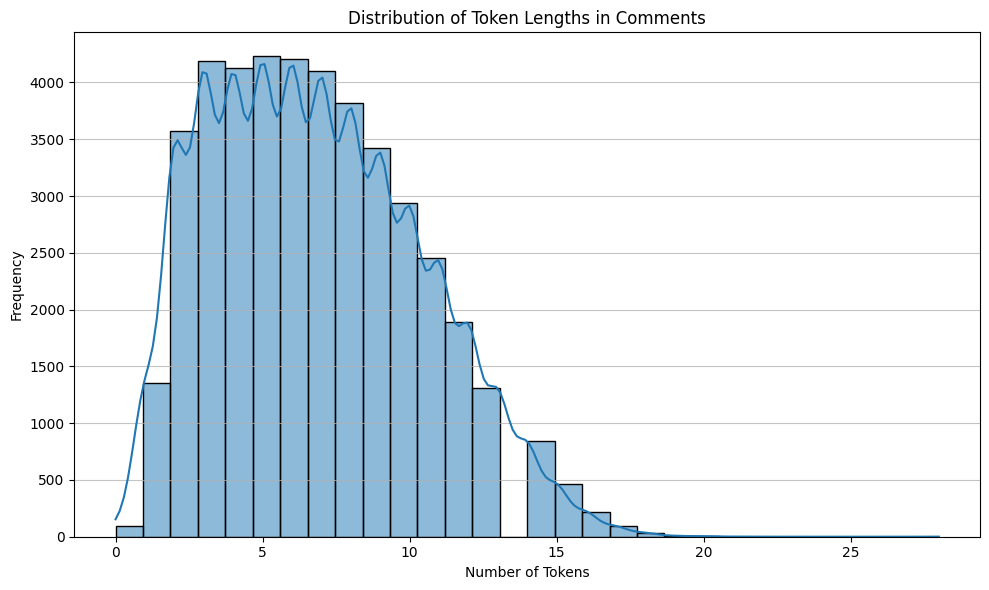

Average token length: 6.80
Median token length: 6.0
Max token length: 28


In [ ]:
token_lengths = train_df['preprocessing'].apply(lambda x: len(x['tokens']))

plt.figure(figsize=(10, 6))
sns.histplot(token_lengths, bins=30, kde=True)
plt.title('Distribution of Token Lengths in Comments')
plt.xlabel('Number of Tokens')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.tight_layout()
plt.savefig('token_length_distribution.png')
plt.show()

print(f"Average token length: {token_lengths.mean():.2f}")
print(f"Median token length: {token_lengths.median()}")
print(f"Max token length: {token_lengths.max()}")

In [ ]:
# Handle class imbalance
print("\nHandling class imbalance...")
# We'll use weights for each class during model training
class_weights = {}
for emotion, count in emotion_counts.items():
    # Calculate weight as inverse of frequency
    class_weights[emotion] = 1 / (count / total_samples)

# Normalize weights
max_weight = max(class_weights.values())
for emotion in class_weights:
    class_weights[emotion] = class_weights[emotion] / max_weight

print("\nClass weights (for handling imbalance):")
for emotion, weight in sorted(class_weights.items(), key=lambda x: x[1], reverse=True):
    print(f"{emotion}: {weight:.4f}")


Handling class imbalance...

Class weights (for handling imbalance):
grief: 1.0000
pride: 0.6937
relief: 0.5033
nervousness: 0.4695
embarrassment: 0.2541
remorse: 0.1413
fear: 0.1292
desire: 0.1201
disgust: 0.0971
excitement: 0.0903
surprise: 0.0726
caring: 0.0708
realization: 0.0694
disappointment: 0.0607
sadness: 0.0581
confusion: 0.0563
joy: 0.0530
anger: 0.0491
optimism: 0.0487
disapproval: 0.0381
love: 0.0369
curiosity: 0.0351
amusement: 0.0331
annoyance: 0.0312
gratitude: 0.0289
approval: 0.0262
admiration: 0.0186
neutral: 0.0054


## Feature extraction using BERT embeddings 📬

In [ ]:

print("\nExtracting BERT embeddings...")
# Load pre-trained BERT model and tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained('bert-base-uncased')

def extract_bert_embeddings(texts, batch_size=32):
    """Extract BERT embeddings for a list of texts"""
    all_embeddings = []

    for i in range(0, len(texts), batch_size):
        batch_texts = texts[i:i+batch_size]

        # Tokenize
        encoded_input = tokenizer(batch_texts, padding=True, truncation=True,
                                 max_length=128, return_tensors='pt')

        # Get BERT embeddings
        with torch.no_grad():
            model_output = model(**encoded_input)

        # Use CLS token embedding as the sentence embedding
        batch_embeddings = model_output.last_hidden_state[:, 0, :].numpy()
        all_embeddings.append(batch_embeddings)

        if (i + batch_size) % 320 == 0:
            print(f"Processed {i + batch_size} samples")

    return np.vstack(all_embeddings)

# Extract embeddings for a subset of the training data (for demonstration)
# In practice, you may want to process the full dataset or use a GPU
sample_size = 1000  # Using a small sample for demonstration
train_sample = train_df.sample(sample_size, random_state=42)

print(f"Extracting BERT embeddings for {sample_size} samples...")
embeddings = extract_bert_embeddings(train_sample['text'].tolist())

print(f"Embedding shape: {embeddings.shape}")  # Should be (sample_size, 768)


Extracting BERT embeddings...
Extracting BERT embeddings for 1000 samples...
Processed 320 samples
Processed 640 samples
Processed 960 samples
Embedding shape: (1000, 768)



Reducing dimensionality with t-SNE for visualization...


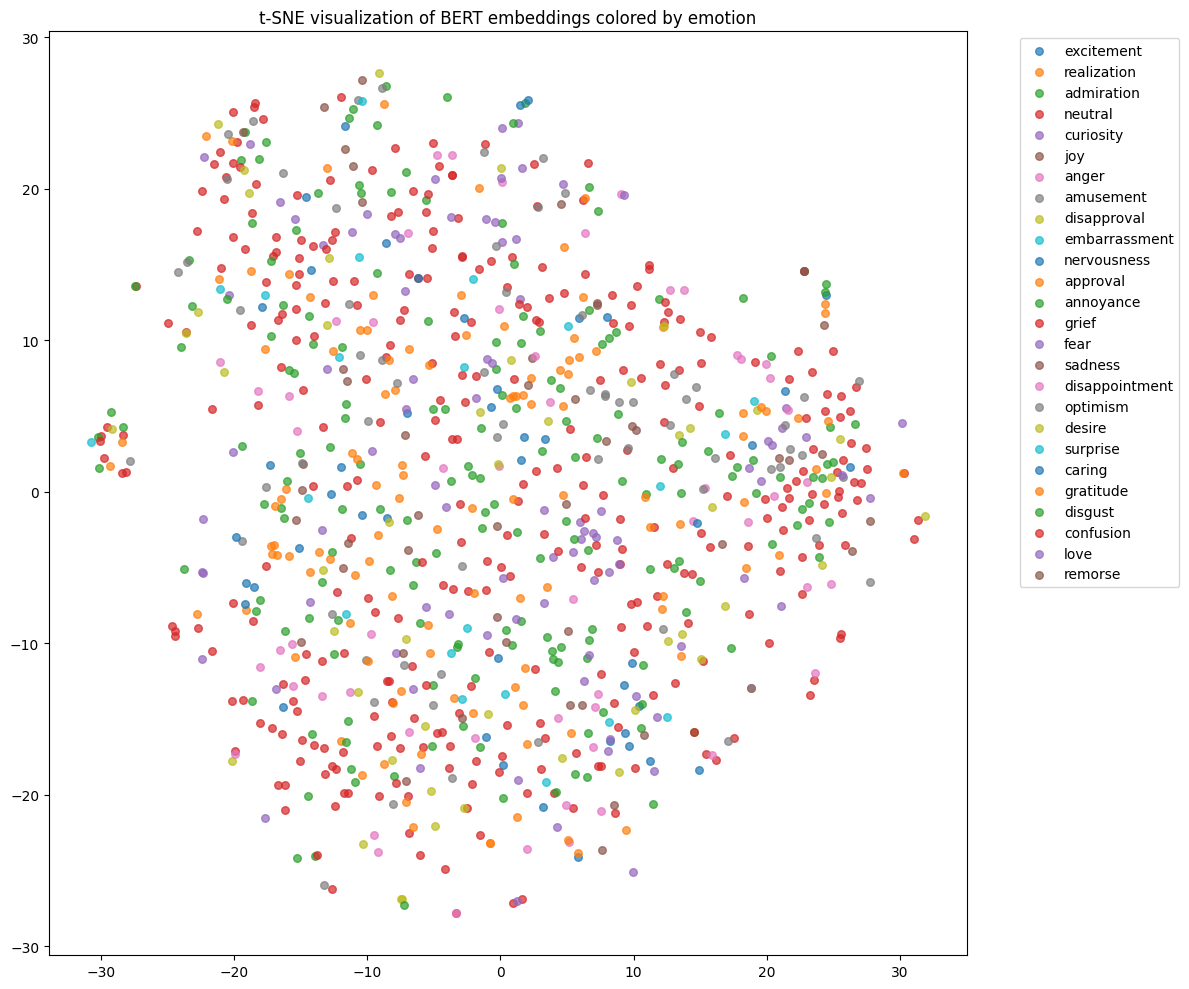

In [ ]:
# Visualize embeddings with t-SNE
from sklearn.manifold import TSNE
import matplotlib.colors as mcolors

print("\nReducing dimensionality with t-SNE for visualization...")
# Get all unique emotions in the sample
unique_emotions = set()
for labels in train_sample['labels']:
    for label in labels:
        unique_emotions.add(emotion_mapping[label])

# Assign a color to each emotion
colors = list(mcolors.TABLEAU_COLORS.values())
emotion_to_color = {emotion: colors[i % len(colors)] for i, emotion in enumerate(unique_emotions)}

# For multi-label samples, we'll choose the first emotion for coloring
sample_emotions = []
for labels in train_sample['labels']:
    if labels:
        sample_emotions.append(emotion_mapping[labels[0]])
    else:
        sample_emotions.append('unknown')

# Apply t-SNE
tsne = TSNE(n_components=2, random_state=42, n_jobs=-1)
embeddings_2d = tsne.fit_transform(embeddings)

# Create a scatter plot
plt.figure(figsize=(12, 10))
for emotion in unique_emotions:
    # Get indices of samples with this emotion as the first label
    indices = [i for i, e in enumerate(sample_emotions) if e == emotion]
    if indices:
        plt.scatter(
            embeddings_2d[indices, 0],
            embeddings_2d[indices, 1],
            label=emotion,
            alpha=0.7,
            s=30
        )

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title('t-SNE visualization of BERT embeddings colored by emotion')
plt.tight_layout()
plt.savefig('tsne_visualization.png')
plt.show()

In [ ]:
# Save the preprocessed data and embeddings
print("\nSaving preprocessed data...")
train_sample['bert_embeddings'] = list(embeddings)
train_sample.to_pickle('preprocessed_goemotion_sample.pkl')

# Summary statistics
print("\n===== Preprocessing Summary =====")
print(f"Original dataset size: {len(train_df)} train, {len(validation_df)} validation, {len(test_df)} test samples")
print(f"Number of unique emotions: {len(emotion_mapping)}")
print(f"Most common emotions: {', '.join([f'{e} ({c})' for e, c in emotion_counts.most_common(5)])}")
print(f"Least common emotions: {', '.join([f'{e} ({c})' for e, c in emotion_counts.most_common()[-5:]])}")
print(f"Average text length (tokens): {token_lengths.mean():.2f}")
print(f"BERT embedding dimension: 768")
print("\nPreprocessing techniques applied:")
print("- Lowercasing")
print("- Special character, URL, and number removal")
print("- Tokenization")
print("- Stopword removal")
print("- Stemming and lemmatization")
print("\nClass imbalance handling:")
print("- Class weights calculated based on inverse frequency")
print("\nFeature extraction:")
print("- BERT embeddings (768-dimensional)")
print("\nVisualization created:")
print("- Overall word cloud")
print("- Word clouds for top 6 emotions")
print("- Token length distribution")
print("- t-SNE visualization of BERT embeddings")

print("\nAll preprocessing steps completed successfully!")


Saving preprocessed data...

===== Preprocessing Summary =====
Original dataset size: 43410 train, 5426 validation, 5427 test samples
Number of unique emotions: 28
Most common emotions: neutral (14219), admiration (4130), approval (2939), gratitude (2662), annoyance (2470)
Least common emotions: embarrassment (303), nervousness (164), relief (153), pride (111), grief (77)
Average text length (tokens): 6.80
BERT embedding dimension: 768

Preprocessing techniques applied:
- Lowercasing
- Special character, URL, and number removal
- Tokenization
- Stopword removal
- Stemming and lemmatization

Class imbalance handling:
- Class weights calculated based on inverse frequency

Feature extraction:
- BERT embeddings (768-dimensional)

Visualization created:
- Overall word cloud
- Word clouds for top 6 emotions
- Token length distribution
- t-SNE visualization of BERT embeddings

All preprocessing steps completed successfully!
